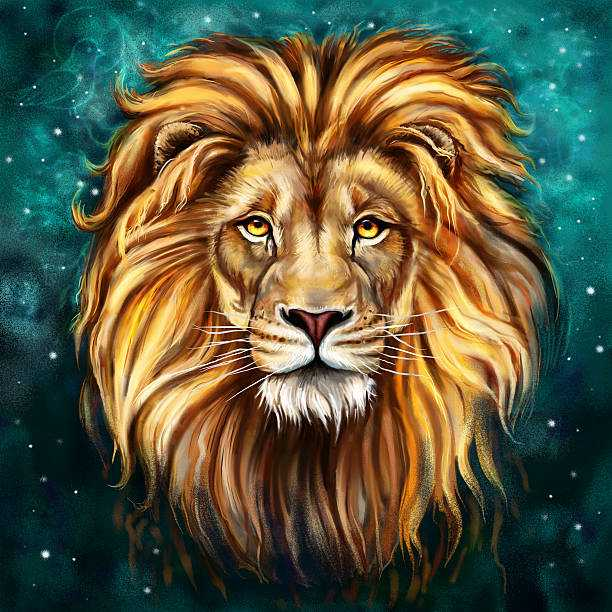

In [1]:
import cv2
from IPython.display import display
from PIL import Image

# Load the image
image = cv2.imread('lion.jpg')

# Compress and save as JPEG with quality = 50 (lower means more compression)
jpeg_path = 'compressed_image.jpg'
cv2.imwrite(jpeg_path, image, [cv2.IMWRITE_JPEG_QUALITY, 50])

# Display the compressed JPEG image
display(Image.open(jpeg_path))


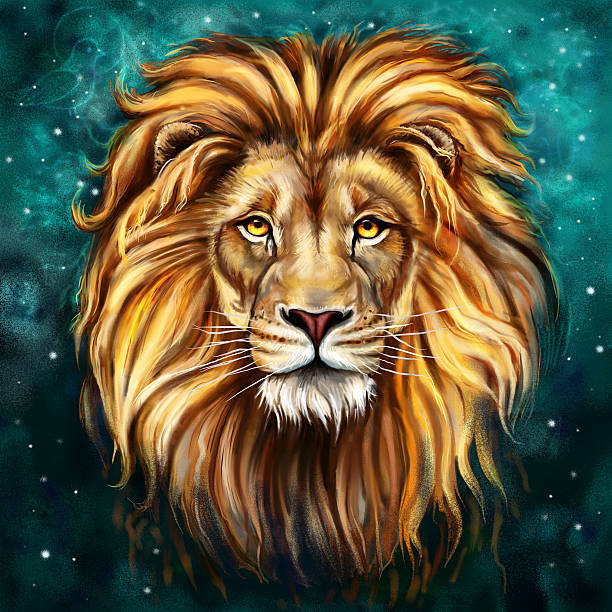

In [2]:
from PIL import Image

# Open the image
image = Image.open('lion.jpg')

# Save as PNG with maximum compression level
png_path = 'compressed_image.png'
image.save(png_path, format='PNG', optimize=True, compress_level=9)

# Display the compressed PNG image
display(Image.open(png_path))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8690 - loss: 0.4221 - val_accuracy: 0.9785 - val_loss: 0.0623
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9823 - loss: 0.0577 - val_accuracy: 0.9864 - val_loss: 0.0426
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9884 - val_loss: 0.0358
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9881 - val_loss: 0.0366
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9889 - val_loss: 0.0385
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9938 - loss: 0.0188 - val_accuracy: 0.9888 - val_loss: 0.0401
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9953 - loss: 0.0157 - val_accuracy: 0.9918 - val_loss: 0.0284
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9957 - loss: 0.0135 - val_accuracy: 

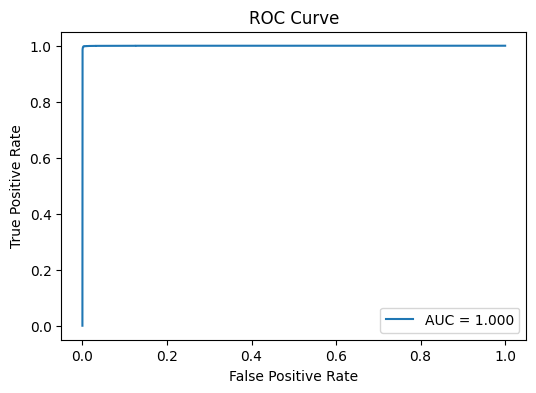

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compute ROC and AUC
y_test_bin = to_categorical(y_test, 10)
y_pred_prob = model.predict(x_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3350 - loss: 1.8024 - val_accuracy: 0.5262 - val_loss: 1.3070
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5520 - loss: 1.2484 - val_accuracy: 0.5895 - val_loss: 1.1429
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6119 - loss: 1.0927 - val_accuracy: 0.6270 - val_loss: 1.0674
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6575 - loss: 0.9717 - val_accuracy: 0.6631 - val_loss: 0.9649
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6890 - loss: 0.8890 - val_accuracy: 0.6739 - val_loss: 0.9664
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7204 - loss: 0.8033 - val_accuracy: 0.6852 - val_loss: 0.9135
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7394 - loss: 0.7442 - val_accuracy: 0.6946 - val_loss: 0.9009
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7579 - loss: 0.6963 - val_accuracy: 0.

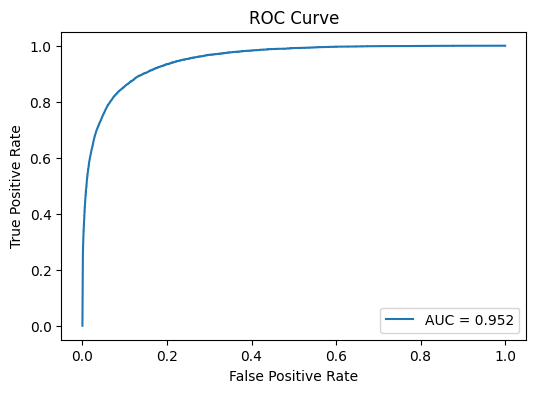

In [4]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train_cat, epochs=50, batch_size=64, validation_data=(x_test, y_test_cat))

# Evaluate model
y_pred = np.argmax(model.predict(x_test), axis=1)

# Calculate metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compute ROC and AUC
y_test_bin = to_categorical(y_test, 10)
y_pred_prob = model.predict(x_test)

fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(roc_auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
